In [149]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# load the data
data = pd.read_csv('results.csv')
data['size'] = data['width'].astype('str') + 'x' + data['height'].astype('str')
data['convp_normalized'] = data['convp'] / data['num_seams_removed']
data['pathsum_normalized'] = data['pathsum'] / data['num_seams_removed']
data['rmpath_normalized'] = data['rmpath'] / data['num_seams_removed']
data['minpath_normalized'] = data['minpath'] / data['num_seams_removed']
data['total_normalized'] = data['total'] / data['num_seams_removed']
data['num_seams_removed_normalized'] = data['num_seams_removed'] / data['width']
data = data.loc[data.groupby(['testname', 'size', 'num_seams_removed'])['total'].idxmin()]
data.head()

,testname,width,height,num_seams_removed,grey,conv,convp,pathsum,minpath,rmpath,malloc,total,size,convp_normalized,pathsum_normalized,rmpath_normalized,minpath_normalized,total_normalized,num_seams_removed_normalized
1658,base,1280,720,1,18384873.0,424507066.0,0.0,3.422242e+07,52893.0,1444960.0,4559239.0,48317144,1280x720,0.000000e+00,3.422242e+07,1.444960e+06,52893.000000,4.831714e+07,0.000781
1664,base,1280,720,41,17361685.0,416874779.0,78508217.0,1.190870e+09,1947952.0,42997047.0,3431938.0,175199136,1280x720,1.914835e+06,2.904560e+07,1.048708e+06,47511.024390,4.273150e+06,0.032031
1676,base,1280,720,81,18383043.0,424546371.0,164980542.0,2.439029e+09,3916744.0,86460823.0,2858836.0,314017496,1280x720,2.036797e+06,3.011146e+07,1.067418e+06,48354.864198,3.876759e+06,0.063281
1681,base,1280,720,121,18371924.0,424414653.0,247710124.0,3.582496e+09,5803952.0,127289455.0,3165261.0,440925097,1280x720,2.047191e+06,2.960740e+07,1.051979e+06,47966.545455,3.644009e+06,0.094531
1690,base,1280,720,161,17641419.0,424372021.0,330170259.0,4.689699e+09,7690619.0,167268595.0,2566650.0,563940834,1280x720,2.050747e+06,2.912856e+07,1.038935e+06,47767.819876,3.502738e+06,0.125781


In [ ]:
# add in a speedup
data['speedup'] = np.nan
for size in sizes:
    for seams in data[(data['size'] == size) & (data['testname'] != 'peak')]['num_seams_removed'].unique():
        rows = data[(data['size'] == size) & (data['testname'] != 'peak') & (data['num_seams_removed'] == seams)]
        try:
            speedup = rows[rows['testname'] == 'base']['total_normalized'].iloc[0] / rows[rows['testname'] == 'car']['total_normalized'].iloc[0]
        except:
            continue
        data.loc[(data['testname'] == 'car') & (data['size'] == size) & (data['num_seams_removed'] == seams), 'speedup'] = speedup

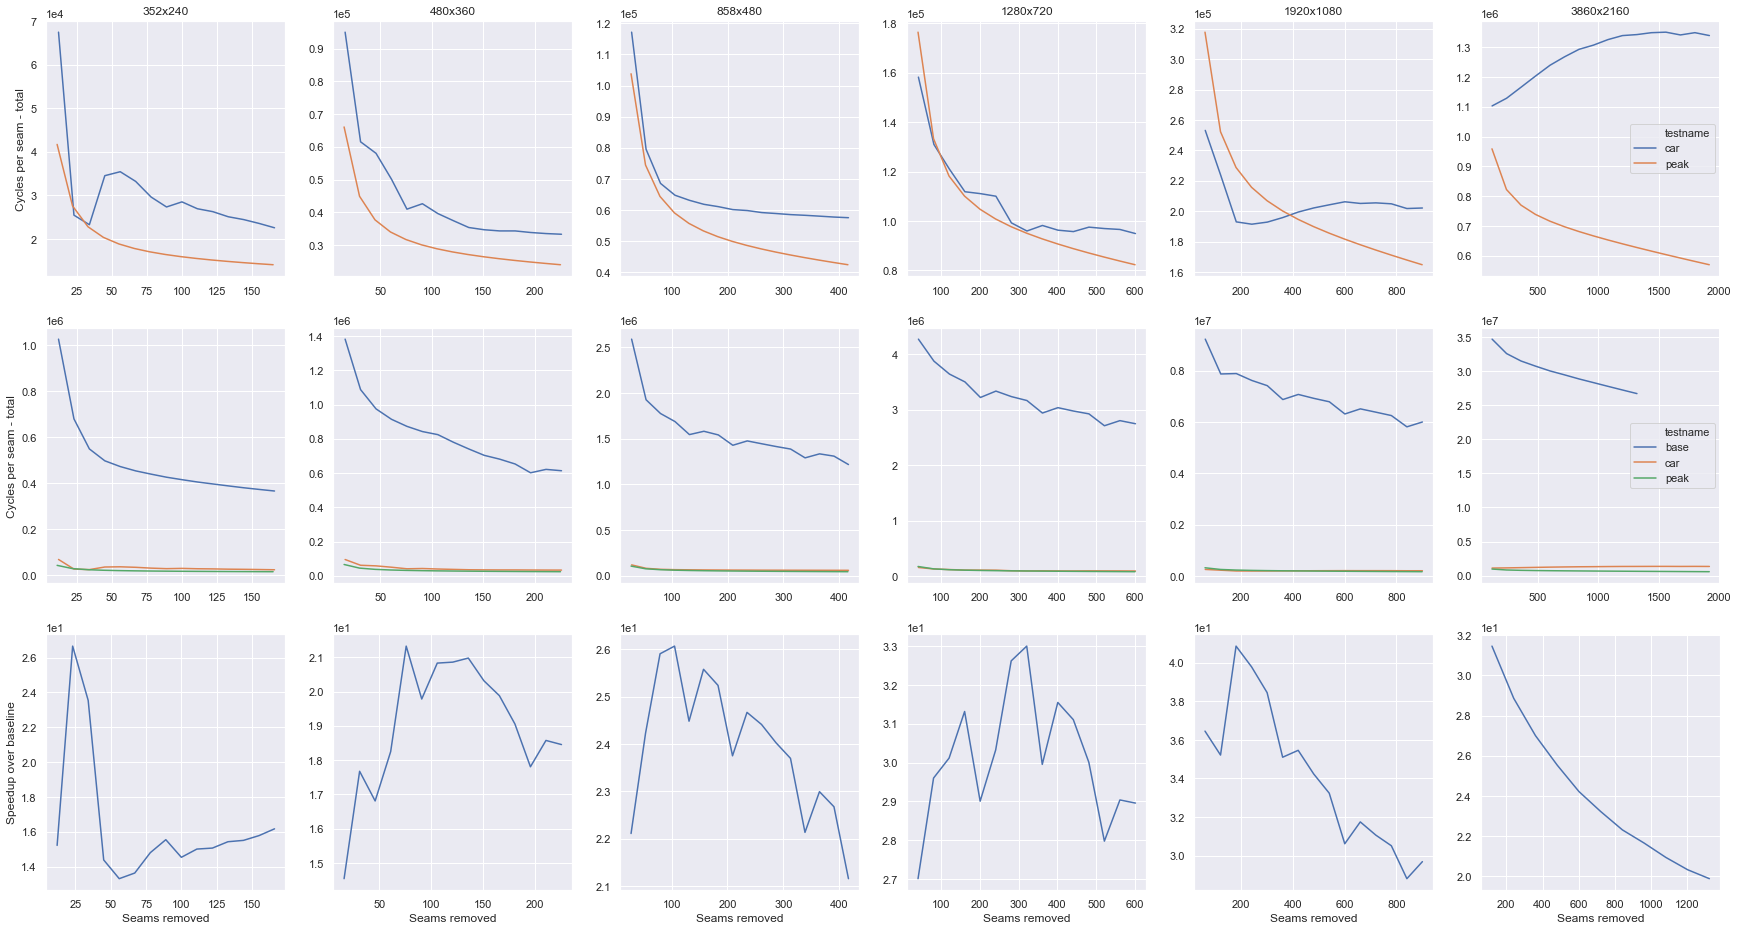

In [163]:
# make the plots

sns.set()
sizes = ['352x240', '480x360', '858x480', '1280x720', '1920x1080', '3860x2160']
f, axes = plt.subplots(3, len(sizes), figsize=(30, 16))
for i, size in enumerate(sizes):
    data_size = data[data['size'] == size]
    data_size = data_size[data_size['testname'] != 'base']
    data_size = data_size[data_size['num_seams_removed'] > 1]
    ax = sns.lineplot('num_seams_removed', 'total_normalized', hue='testname', data=data_size, ax=axes[0, i])
    if i == 0:
        ax.set_ylabel('Cycles per seam - total')
    else:
        ax.set_ylabel(' ')
    ax.set_xlabel(' ')
    ax.set_title(size)
    if i != len(sizes) - 1: ax.get_legend().set_visible(False)
    ax.ticklabel_format(style='sci', scilimits=(0,0), axis='y')

for i, size in enumerate(sizes):
    data_size = data[data['size'] == size]
    data_size = data_size[data_size['num_seams_removed'] > 1]
    ax = sns.lineplot('num_seams_removed', 'total_normalized', hue='testname', data=data_size, ax=axes[1, i])
    if i == 0:
        ax.set_ylabel('Cycles per seam - total')
    else:
        ax.set_ylabel(' ')
    ax.set_xlabel(' ')
    if i != len(sizes) - 1: ax.get_legend().set_visible(False)
    ax.ticklabel_format(style='sci', scilimits=(0,0), axis='y')

for i, size in enumerate(sizes):
    data_size = data[data['size'] == size]
    data_size = data_size[data_size['num_seams_removed'] > 1]
    data_size = data_size[data_size['speedup'] != np.nan]
    ax = sns.lineplot('num_seams_removed', 'speedup', data=data_size, ax=axes[2, i])
    if i == 0:
        ax.set_ylabel('Speedup over baseline')
    else:
        ax.set_ylabel(' ')
    ax.set_xlabel('Seams removed')
    ax.ticklabel_format(style='sci', scilimits=(0,0), axis='y')
